In [1]:
import numpy as np

### Fast Sorting in Numpy: <code>np.sort</code> and <code>np.argsort</code>

In [2]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [3]:
x.sort()
print(x)

[1 2 3 4 5]


In [4]:
# argsort produces a list of teh indices of the values from the original list in the sorted list
x = np.array([2,1,5,3,4])
i = np.argsort(x)
print(i)

[1 0 3 4 2]


In [5]:
# produce the sorted array using fancy indexing
x[i]

array([1, 2, 3, 4, 5])

#### sorting along rows and columns

<strong>NOTE:</strong> sorting rows and columns individually jumbles them up and thus the relationship between the dimensions is lost. Thus, when doing this sort, remember that the rows or columns are treated as independent arrays

In [11]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [12]:
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [13]:
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## Partial Sorts: Partitioning

In [14]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [17]:
# partition the list into the first three and the rest
# then get the first three
np.sort(np.partition(x,3)[:3])

array([4, 5, 6, 7])

In [20]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Example:k-Nearest Neighbours

In [21]:
X = rand.rand(10,2)

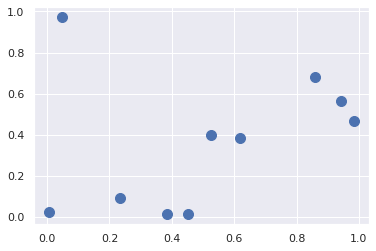

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1], s=100);

In [42]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:])**2, axis=-1)

In [43]:
# for each pair of points, compute difference in their coordinate
difference = X[:, np.newaxis, :] - X[np.newaxis,:,:]
difference.shape

(10, 10, 2)

In [46]:
sq_differences = difference**2
sq_differences.shape

(10, 10, 2)

In [47]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [48]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)
# remember that the indices returned by argsort are the positions that these values were in the original
# array before they were sorted

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


Notice that in sorting the whole matrix, we do more work than is required since the matrix is symmetrical.
To get the nearest k neighbours, we should partition each row into the smallest k+1 distances.

In [56]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

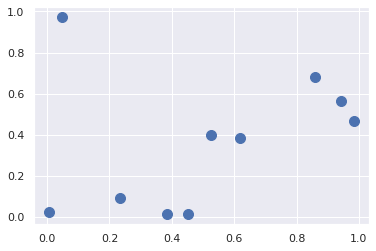

In [58]:
plt.scatter(X[:,0], X[:,1], s=100)
